# IMPORTING DATA AND REQUIRED LIBRARIES

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install streamlit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import re

In [2]:
df = pd.read_csv(r'C:\Users\saiku\Downloads\Data visualization - Using python\car_dataset.csv')
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Seating_Capacity,Type,Power.1,Torque.1
0,Hyundai,Santro,Era Mt,"₹ 429,990.000000000000000",1086,4,35.0,Petrol,1560,3610.0,1645,Hatchback,5,Manual,69.0,99.04
1,Hyundai,Santro,Magna Mt,"₹ 503,990.000000000000000",1086,4,35.0,Petrol,1560,3610.0,1645,Hatchback,5,Manual,69.0,99.04
2,Hyundai,Santro,Magna Mt Cng,"₹ 547,990.000000000000000",1086,4,35.0,CNG,1560,3610.0,1645,Hatchback,5,Manual,59.0,99.04
3,Hyundai,Santro,Magna Amt,"₹ 530,990.000000000000000",1086,4,35.0,Petrol,1560,3610.0,1645,Hatchback,5,AMT,69.0,10.10
4,Hyundai,Santro,Sportz Mt,"₹ 512,990.000000000000000",1086,4,35.0,Petrol,1560,3610.0,1645,Hatchback,5,Manual,69.0,10.10


In [5]:
df.info()
sns.set_theme(style="whitegrid", rc={"figure.figsize": (10, 6)})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1276 non-null   object 
 1   Model               1276 non-null   object 
 2   Variant             1276 non-null   object 
 3   Ex-Showroom_Price   1276 non-null   object 
 4   Displacement        1276 non-null   int64  
 5   Cylinders           1276 non-null   int64  
 6   Fuel_Tank_Capacity  1276 non-null   float64
 7   Fuel_Type           1276 non-null   object 
 8   Height              1276 non-null   int64  
 9   Length              1276 non-null   float64
 10  Width               1276 non-null   int64  
 11  Body_Type           1276 non-null   object 
 12  Seating_Capacity    1276 non-null   int64  
 13  Type                1276 non-null   object 
 14  Power.1             1276 non-null   float64
 15  Torque.1            1276 non-null   float64
dtypes: flo

## DATA CLEANING / PRE-PROCESSING

In [6]:
# clean price: remove common symbols and extract first number-like part
# short + robust: convert to str, replace symbols, extract digits via regex with pandas

df['price_numeric'] = (
    df.get('Ex-Showroom_Price', pd.Series([np.nan]*len(df)))
      .astype(str)
      .str.replace(r'[₹Rs\.,\sA-Za-z]+', '', regex=True)
      .replace('', np.nan)
      .astype(float)
)

# coerce numeric columns

for c in ['Displacement','Cylinders','Fuel_Tank_Capacity','Height',
          'Length','Width','Seating_Capacity','Power.1','Torque.1']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# ensure categorical columns are string (nice for plotting)

for c in ['Make','Model','Variant','Fuel_Type','Body_Type','Type']:
    if c in df.columns:
        df[c] = df[c].astype(str).fillna('Unknown')

# quick check
print("Rows:", len(df))
print("Cols:", df.columns.tolist())
print(df[['price_numeric'] + [c for c in ['Displacement','Power.1','Torque.1'] if c in df.columns]].describe().round(2))

Rows: 1276
Cols: ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Height', 'Length', 'Width', 'Body_Type', 'Seating_Capacity', 'Type', 'Power.1', 'Torque.1', 'price_numeric']
       price_numeric  Displacement  Power.1  Torque.1
count   1.276000e+03       1276.00  1276.00   1276.00
mean    4.596538e+21       1841.32   156.48    266.11
std     1.214735e+22       1073.25   136.65    185.64
min     2.364470e+20          0.00     0.00      0.00
25%     7.438760e+20       1198.00    83.00    132.00
50%     1.060065e+21       1497.00   110.00    209.00
75%     2.979828e+21       1998.00   173.00    350.00
max     2.121554e+23       7993.00  1600.00   1712.00


## VISUALIZATIONS

COUNT OF VEHICLES BY BODY TYPE

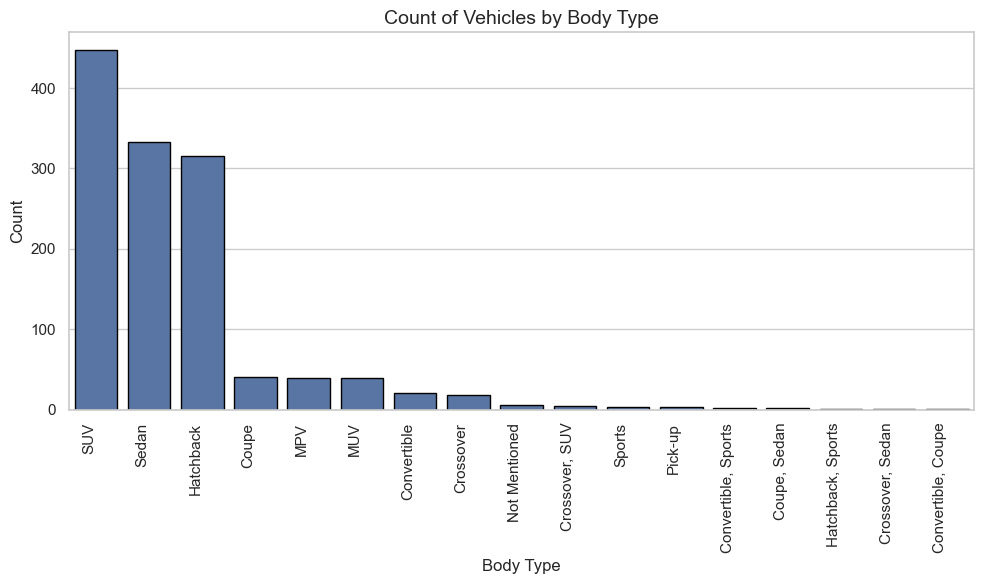

In [7]:
plt.figure(figsize=(10,6))
order = df['Body_Type'].value_counts().index
sns.countplot(data=df, x='Body_Type', order=order,edgecolor='black')
plt.title("Count of Vehicles by Body Type",fontsize=14)
plt.xlabel("Body Type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

FUEL TYPE DISTRIBUTION ACROSS VEHICLES

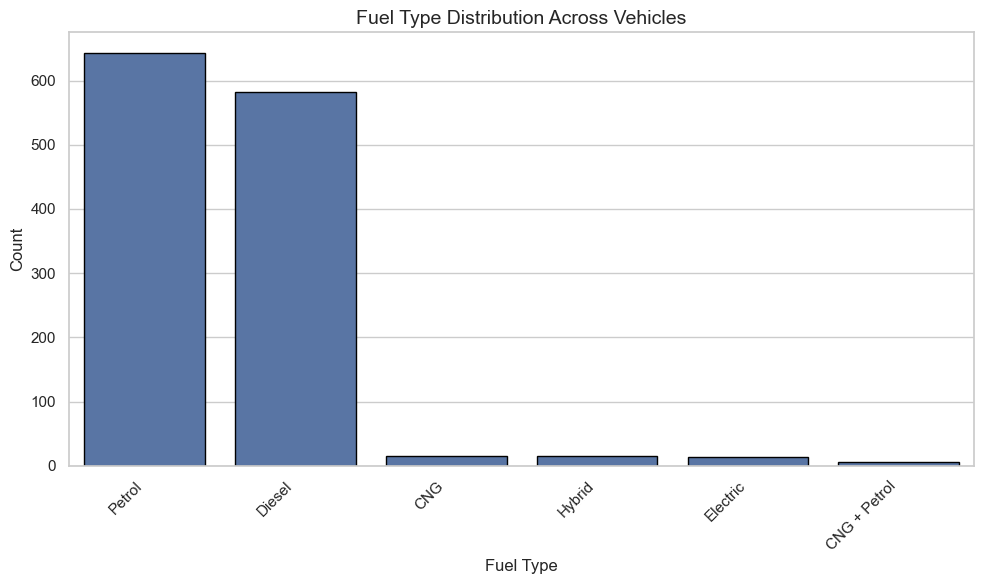

In [8]:
plt.figure(figsize=(10,6))
order = df['Fuel_Type'].value_counts().index
sns.countplot(data=df, x='Fuel_Type', order=order,edgecolor='black')
plt.title("Fuel Type Distribution Across Vehicles",fontsize = 14)
plt.xlabel("Fuel Type",fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.xticks(rotation = 45,ha='right')
plt.tight_layout()
plt.show()

PRICE DISTRIBUTION

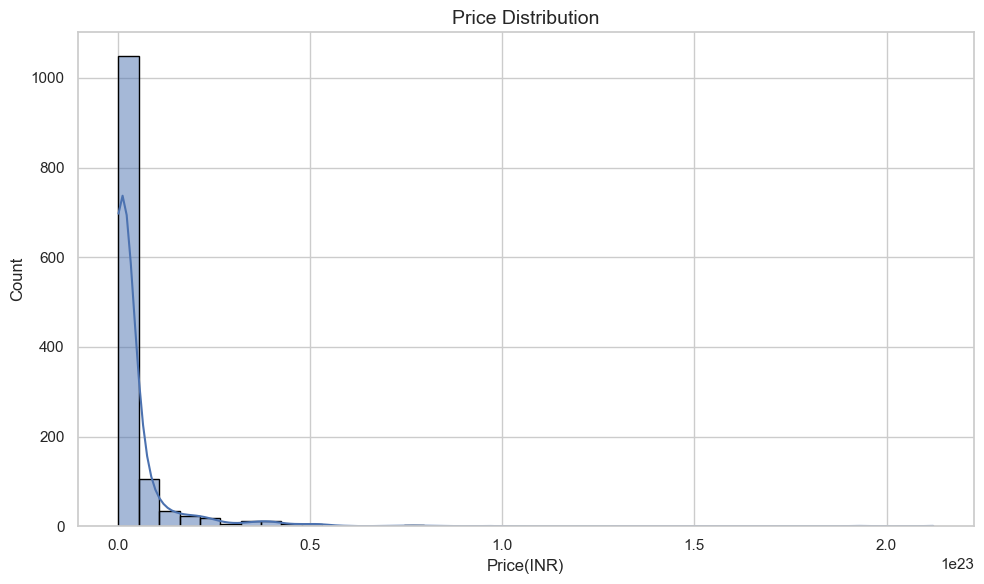

In [9]:
sns.histplot(df['price_numeric'].dropna(), bins=40,edgecolor = "black", kde=True)
plt.title("Price Distribution",fontsize=14)
plt.xlabel("Price(INR)",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.tight_layout()
plt.show()

PRICE VARIATION ACROSS DIFFERENT BODY TYPE

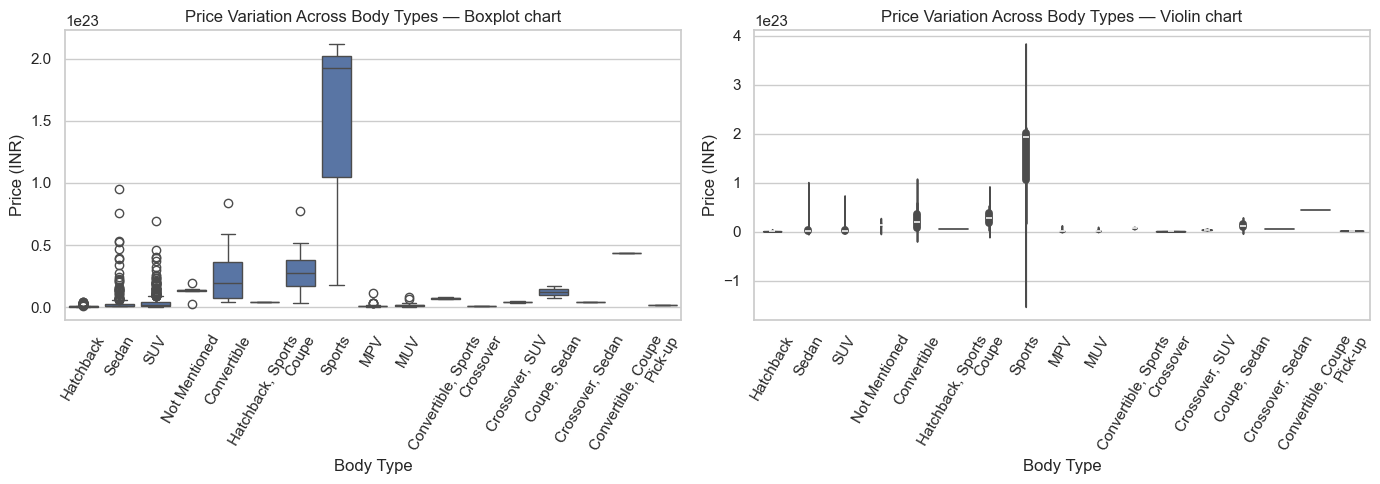

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.boxplot(data=df, x='Body_Type', y='price_numeric', ax=axes[0])
axes[0].set_title("Price Variation Across Body Types — Boxplot chart")
axes[0].tick_params(axis='x', rotation=60)
axes[0].set_xlabel("Body Type")
axes[0].set_ylabel("Price (INR)")
sns.violinplot(data=df, x='Body_Type', y='price_numeric', ax=axes[1])
axes[1].set_title("Price Variation Across Body Types — Violin chart")
axes[1].tick_params(axis='x', rotation=60)
axes[1].set_xlabel("Body Type")
axes[1].set_ylabel("Price (INR)")
plt.tight_layout()
plt.show()

POWER OUTPUT BY FUEL TYPE

c:\Users\saiku\Downloads\Data visualization - Using python\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


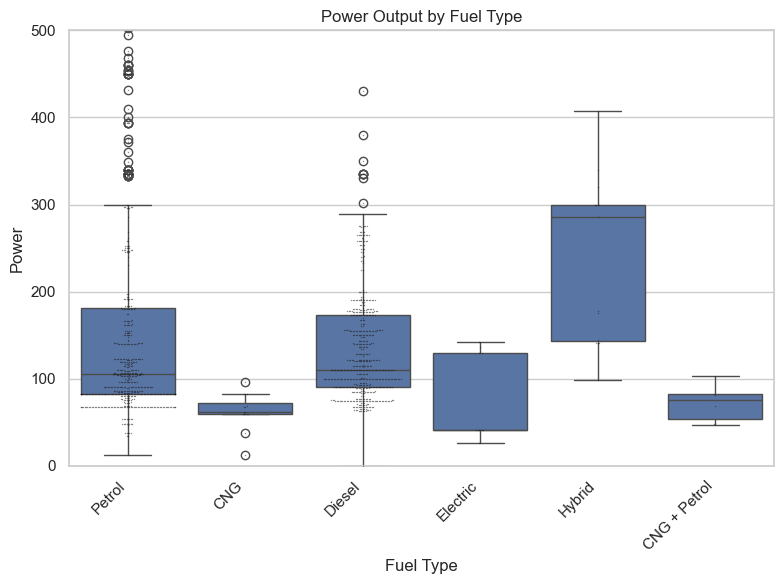

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Fuel_Type', y='Power.1')
swarm_df = df.dropna(subset=['Power.1','Fuel_Type'])
sns.swarmplot(data=swarm_df, x='Fuel_Type', y='Power.1', color='k', alpha=0.5, size=1)
plt.ylim(0, 500)  
plt.title("Power Output by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Power")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

POWER VUS TORQUE SEGMENTED BY BODY TYPE

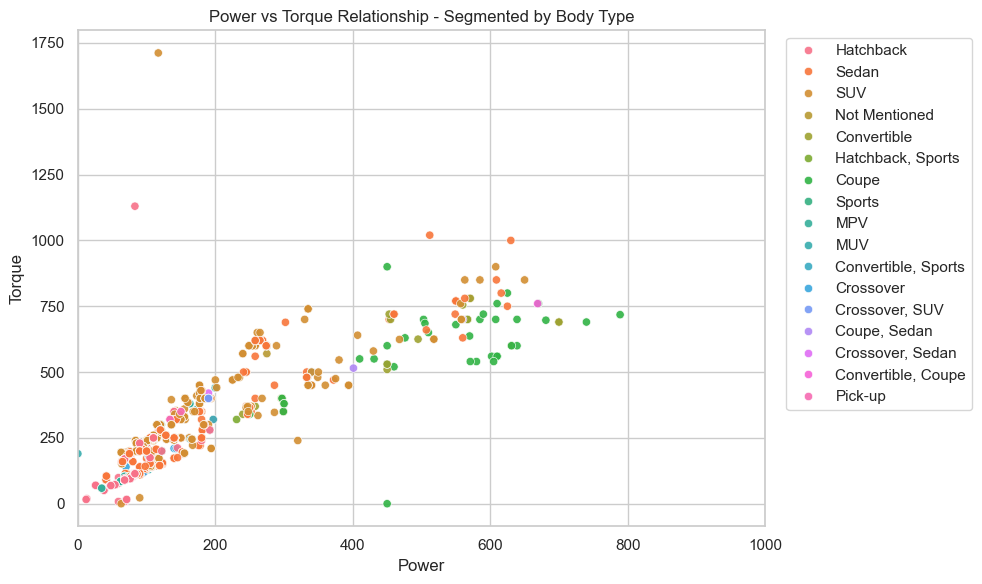

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Power.1', y='Torque.1', hue='Body_Type', alpha=0.9)
plt.xlim(0,1000) # Since there are only two vechicle have power greater than 1000
plt.title("Power vs Torque Relationship - Segmented by Body Type")
plt.xlabel("Power")
plt.ylabel("Torque")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

ENGINE DISPLACEMENT VUS PRICE

C:\Users\saiku\AppData\Local\Temp\ipykernel_6528\4120873409.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = tmp.groupby('disp_bin')['price_numeric'].mean().reset_index()


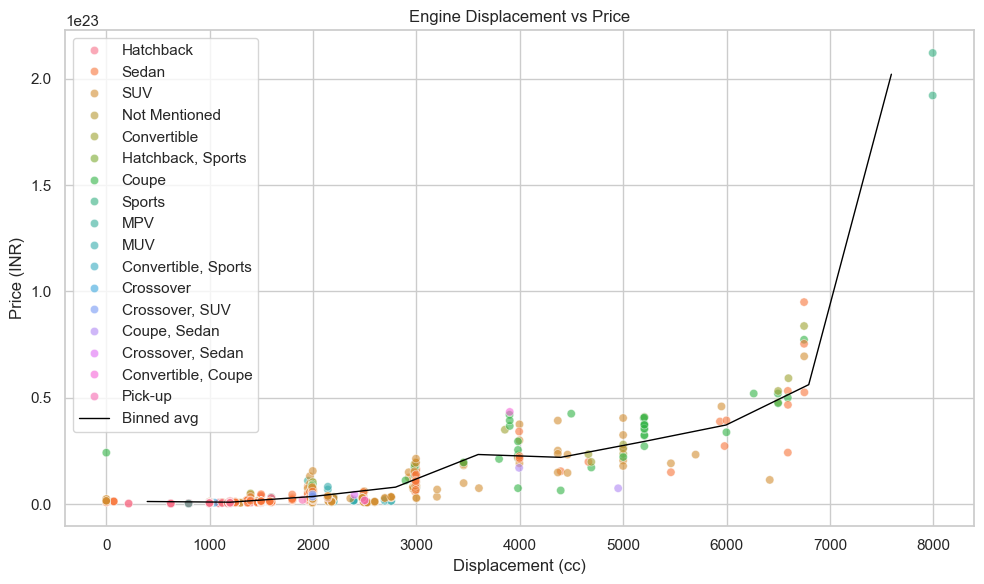

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Displacement', y='price_numeric', hue='Body_Type', alpha=0.6)
tmp = df.dropna(subset=['Displacement','price_numeric'])
tmp['disp_bin'] = pd.cut(tmp['Displacement'], bins=10)
avg = tmp.groupby('disp_bin')['price_numeric'].mean().reset_index()
avg['mid'] = avg['disp_bin'].apply(lambda r: r.mid)
plt.plot(avg['mid'], avg['price_numeric'], color='black', linewidth=1, label='Binned avg')
plt.legend()
plt.title("Engine Displacement vs Price")
plt.xlabel("Displacement (cc)")
plt.ylabel("Price (INR)")
plt.tight_layout()
plt.show()

CORE SPECIFICATIONS - PAIR WISE COMPARISON

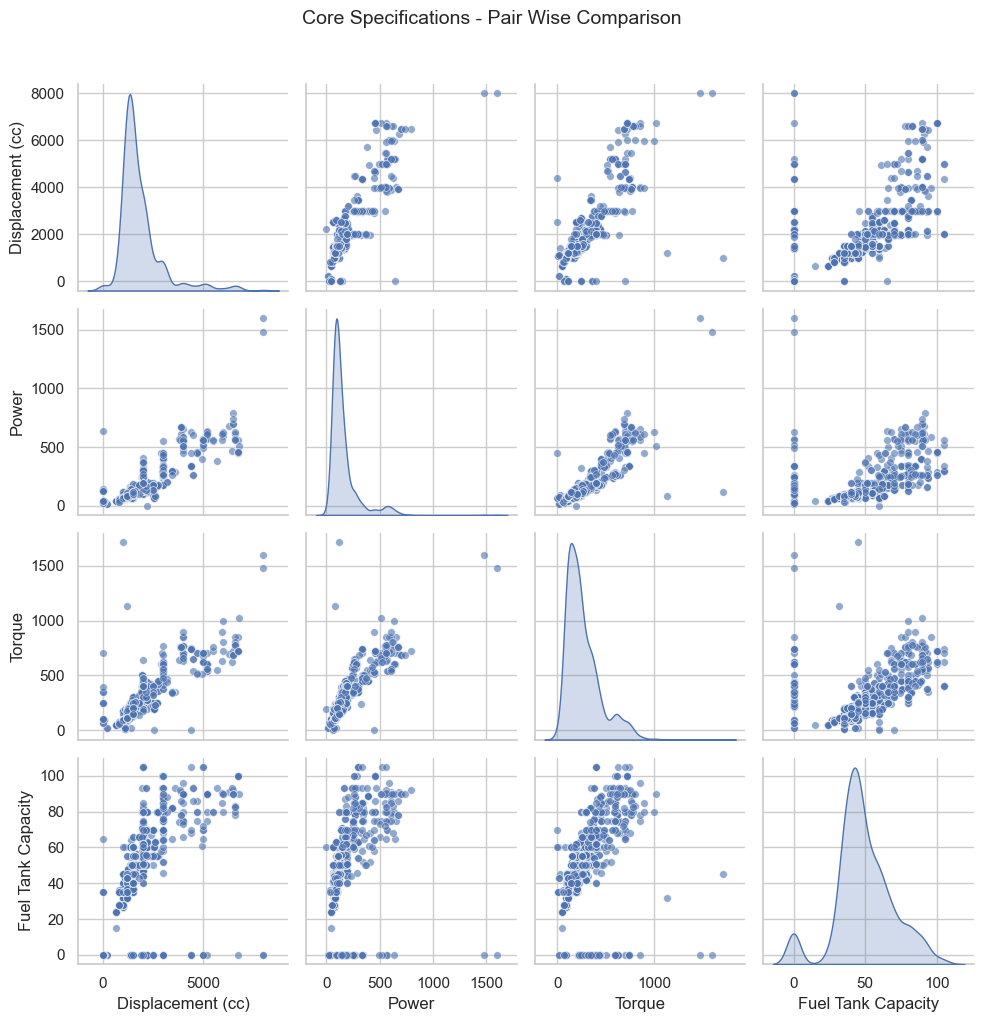

In [15]:
# create core_df from the main df (select core numeric specs) and plot with cleaner, shorter axis labels
core_cols = ['Displacement', 'Power.1', 'Torque.1', 'Fuel_Tank_Capacity']
# ensure columns exist and drop rows with missing values for these columns
core_cols = [c for c in core_cols if c in df.columns]
core_df = df[core_cols].dropna().copy()

label_map = {
    'Displacement': 'Displacement (cc)',
    'Power.1': 'Power',
    'Torque.1': 'Torque',
    'Fuel_Tank_Capacity': 'Fuel Tank Capacity',
}
plot_df = core_df.rename(columns=label_map)
sns.pairplot(plot_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle("Core Specifications - Pair Wise Comparison", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

CORELATION HEATMAP OF NUMERICAL SPECIFICATIONS

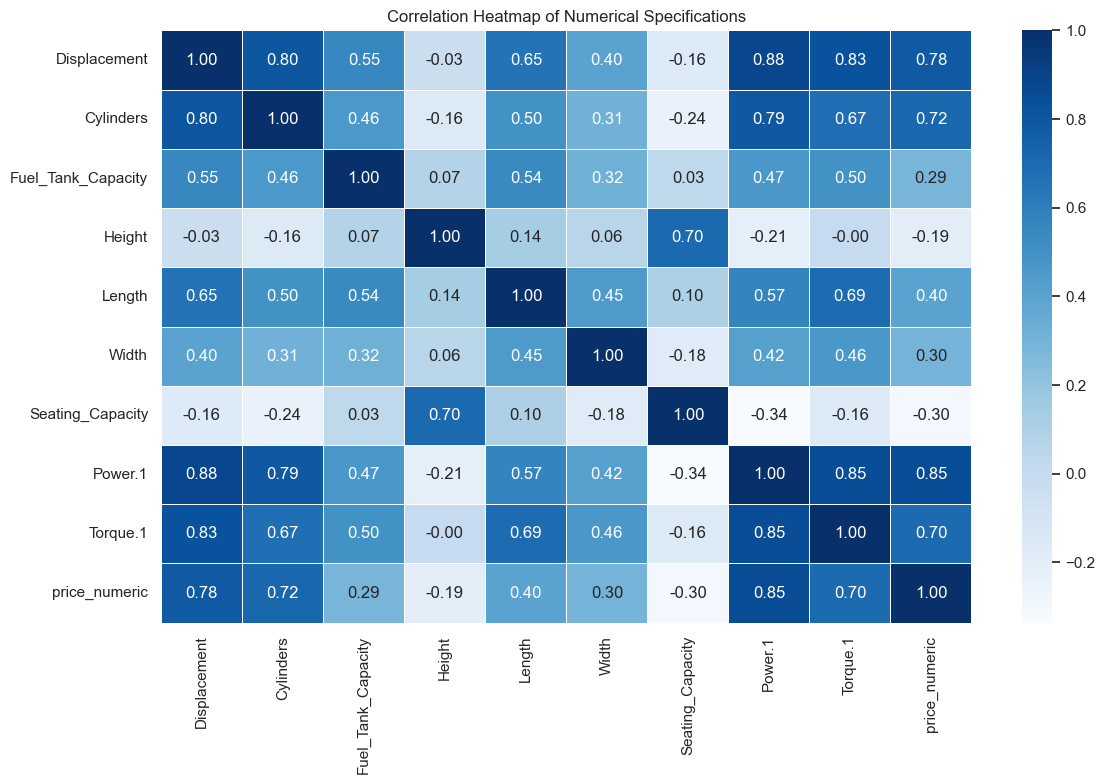

In [16]:
num = df.select_dtypes(include=[np.number])
corr = num.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Specifications")
plt.tight_layout()
plt.show()

TOP 5 MANUFACTURES BY MODEL COUNT AND PRICE

C:\Users\saiku\AppData\Local\Temp\ipykernel_6528\4204052976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, orient='h', palette='pastel', edgecolor='black')


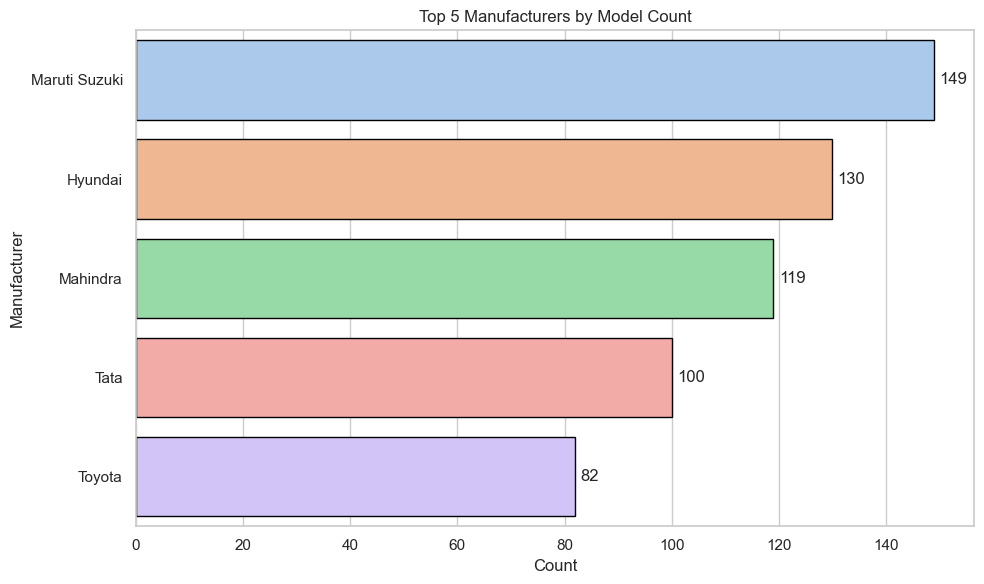

In [26]:
top = df['Make'].value_counts().head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top.values, y=top.index, orient='h', palette='pastel', edgecolor='black')
plt.title("Top 5 Manufacturers by Model Count")
plt.xlabel("Count")
plt.ylabel("Manufacturer")

for i, v in enumerate(top.values):
    plt.text(v + 1, i, str(v), va='center')

plt.tight_layout()
plt.show()

TOP 5 MANUFACTURES BY PRICE(AVG)

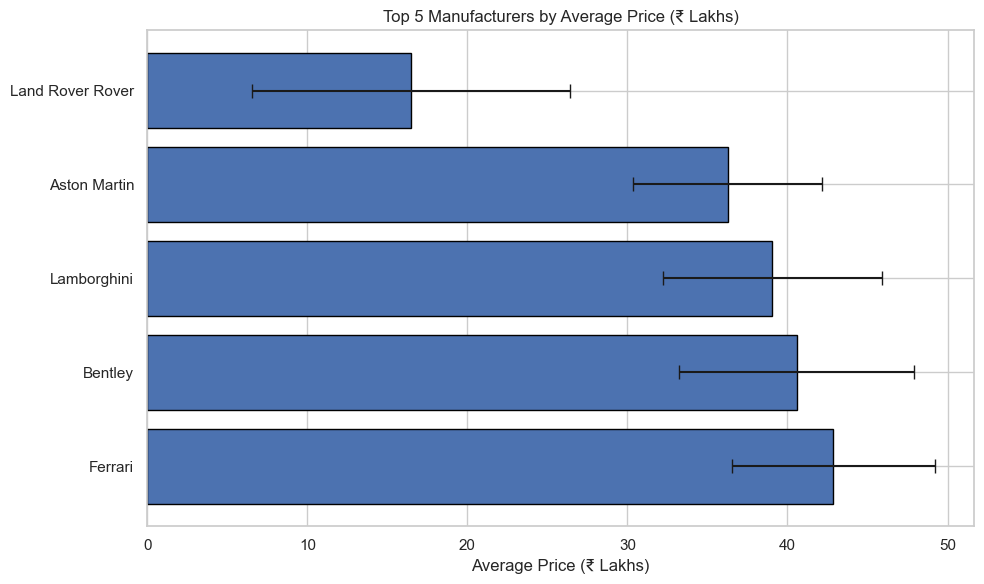

In [ ]:
# Calculating average price 
agg = df.groupby('Make')['price_numeric'].agg(['mean','count','std']).dropna()
agg = agg[agg['count'] >= 3]
top_avg = agg.sort_values('mean', ascending=False).head(5)
plt.figure(figsize=(10,6))
plt.barh(top_avg.index, top_avg['mean']/1e21, xerr=top_avg['std'].fillna(0)/1e21, capsize=5, edgecolor='black')
plt.xlabel("Average Price (₹ Lakhs)")
plt.title("Top 5 Manufacturers by Average Price (₹ Lakhs)")
plt.tight_layout()
plt.show()
